In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

import sys
sys.path.append('..')
from utils.read_utils import load_stickers, load_dataset, load_dataset_7, load_indicators5, load_horizons
from utils.plot_utils import print_score, inverse_transform, plot_prediction
from algorithms.model import lstm_train, svr_train, score

In [4]:
dataset = load_stickers()
dataset.head()

,Symbol,Sector
0,AAPL,Information Technology
1,ABBV,Health Care
2,ABT,Health Care
3,ACN,Information Technology
4,ADBE,Information Technology


In [2]:
dataset = load_stickers()
group = dataset.groupby(['Sector'])
sertors_dict = {}
for sector, df in group:
    symbols = df['Symbol'].ravel()
    sertors_dict[sector] = symbols
sertors_dict

{'Communication Services': array(['CHTR', 'CMCSA', 'DIS', 'FB', 'GOOG', 'GOOGL', 'NFLX', 'T', 'TMUS',
        'VZ'], dtype=object),
 'Consumer Discretionary': array(['AMZN', 'BKNG', 'F', 'GM', 'HD', 'LOW', 'MCD', 'NKE', 'SBUX',
        'TSLA'], dtype=object),
 'Consumer Staples': array(['CL', 'COST', 'KHC', 'KO', 'MDLZ', 'MO', 'PEP', 'PG', 'PM', 'TGT',
        'WBA', 'WMT'], dtype=object),
 'Energy': array(['COP', 'CVX', 'XOM'], dtype=object),
 'Financials': array(['AIG', 'AXP', 'BAC', 'BK', 'BLK', 'C', 'COF', 'GS', 'JPM', 'MA',
        'MET', 'MS', 'PYPL', 'USB', 'V', 'WFC'], dtype=object),
 'Health Care': array(['ABBV', 'ABT', 'AMGN', 'BIIB', 'BMY', 'CVS', 'DHR', 'GILD', 'JNJ',
        'LLY', 'MDT', 'MRK', 'PFE', 'TMO', 'UNH'], dtype=object),
 'Industrials': array(['BA', 'CAT', 'EMR', 'FDX', 'GD', 'GE', 'HON', 'LIN', 'LMT', 'MMM',
        'RTX', 'UNP', 'UPS'], dtype=object),
 'Information Technology': array(['AAPL', 'ACN', 'ADBE', 'AVGO', 'CRM', 'CSCO', 'IBM', 'INTC',
        'MSFT',

In [3]:
# Import the dataset
X_train, X_test, y_train, y_test = load_dataset()
X_train_7, X_test_7, y_train_7, y_test_7 = load_dataset_7()
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_train_7.shape, X_test_7.shape, y_train_7.shape, y_test_7.shape

((79002, 27),
 (19800, 27),
 (79002, 3),
 (19800, 3),
 (78507, 27),
 (19701, 27),
 (78507, 3),
 (19701, 3))

In [4]:
# Import indicators and horizons
all_indicators, combined_indicators1, combined_indicators2, combined_indicators3, combined_indicators4, combined_indicators5 = load_indicators5()
horizons, horizons_7 = load_horizons()

In [5]:
# Normalizing the data set 
X_scaler = MinMaxScaler(feature_range=(0, 1))
X_scaler.fit_transform(X_train[all_indicators])
y_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler.fit_transform(y_train.loc[: ,horizons])
X_scaler_7 = MinMaxScaler(feature_range=(0, 1))
X_scaler_7.fit_transform(X_test_7[all_indicators])
y_scaler_7 = MinMaxScaler(feature_range=(0, 1))
y_scaler_7.fit_transform(y_test_7.loc[: ,horizons_7])

array([[0.02922732],
       [0.03014126],
       [0.02991277],
       ...,
       [0.0135559 ],
       [0.01341075],
       [0.01331398]])

In [6]:
X_train[all_indicators] = X_scaler.transform(X_train[all_indicators])
X_test[all_indicators] = X_scaler.transform(X_test[all_indicators])
X_train_7[all_indicators] = X_scaler_7.transform(X_train_7[all_indicators])
X_test_7[all_indicators] = X_scaler_7.transform(X_test_7[all_indicators])
X_train.head()

,Symbol,Sector,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MFI_14,STOCHk_14_3_3,STOCHd_14_3_3,RSI_14,...,industry_macds_12_26,sp500_future_macd_12_252,sp500_future_macdh_12_252,sp500_future_macds_12_252,dollar_index_macd_12_252,dollar_index_macdh_12_252,dollar_index_macds_12_252,constant_maturity_macd_12_26,constant_maturity_macdh_12_26,constant_maturity_macds_12_26
2018-01-12,AAPL,Information Technology,0.011414,0.521489,0.497368,0.522757,0.494486,0.870397,0.799826,0.644859,...,0.669363,0.774377,0.760467,0.753250,0.197569,0.253106,0.219259,0.264167,0.470645,0.196512
2018-01-16,AAPL,Information Technology,0.011350,0.521548,0.497388,0.522820,0.563877,0.850170,0.845447,0.600396,...,0.673898,0.788947,0.759739,0.768959,0.172437,0.215096,0.201836,0.247962,0.395169,0.213290
2018-01-17,AAPL,Information Technology,0.011557,0.521756,0.497801,0.522918,0.663147,0.877137,0.872069,0.680633,...,0.679414,0.793836,0.760749,0.773881,0.156438,0.195129,0.189547,0.244940,0.379644,0.217073
2018-01-18,AAPL,Information Technology,0.011568,0.521916,0.498003,0.523034,0.733899,0.862350,0.869359,0.684558,...,0.685279,0.796419,0.754510,0.778368,0.142036,0.184213,0.176485,0.268879,0.418213,0.225209
2018-01-19,AAPL,Information Technology,0.011511,0.521980,0.497908,0.523141,0.655697,0.917391,0.891996,0.643829,...,0.691056,0.800513,0.754135,0.782829,0.131017,0.186203,0.163563,0.293547,0.450448,0.236982


In [7]:
y_train.loc[: ,horizons] = y_scaler.transform(y_train.loc[: ,horizons])
y_test.loc[: ,horizons] = y_scaler.transform(y_test.loc[: ,horizons])
y_train_7.loc[: ,horizons_7] = y_scaler_7.transform(y_train_7.loc[: ,horizons_7])
y_test_7.loc[: ,horizons_7] = y_scaler_7.transform(y_test_7.loc[: ,horizons_7])
y_test.tail()

,Symbol,Sector,Close_after_1_day
2021-12-22,XOM,Energy,0.016162
2021-12-23,XOM,Energy,0.016409
2021-12-27,XOM,Energy,0.016352
2021-12-28,XOM,Energy,0.016199
2021-12-29,XOM,Energy,0.016097


In [8]:
preds_train = []
preds_test = []
rmse_c1_all = []
rmse_c2_all = []
rmse_c3_all = []
rmse_c4_all = []
rmse_c5_all = []

for sector in sertors_dict:
    rmse_c1 = []
    rmse_c2 = []
    rmse_c3 = []
    rmse_c4 = []
    rmse_c5 = []
    
    for symbol in sertors_dict[sector]:
        X_train_one = X_train.loc[X_train['Symbol'] == symbol].copy()
        y_train_one = y_train.loc[X_train['Symbol'] == symbol].copy()
        X_test_one = X_test.loc[X_test['Symbol'] == symbol].copy()
        y_test_one = y_test.loc[X_test['Symbol'] == symbol].copy()
        
        preds_train, preds_test = lstm_train(combined_indicators1, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c1.append(score(horizons, y_test_one, preds_test))

        preds_train, preds_test = svr_train(combined_indicators1, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c1.append(score(horizons, y_test_one, preds_test))

        preds_train, preds_test = lstm_train(combined_indicators2, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c2.append(score(horizons, y_test_one, preds_test))

        preds_train, preds_test = svr_train(combined_indicators2, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c2.append(score(horizons, y_test_one, preds_test))

        preds_train, preds_test = lstm_train(combined_indicators3, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c3.append(score(horizons, y_test_one, preds_test))

        preds_train, preds_test = svr_train(combined_indicators3, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c3.append(score(horizons, y_test_one, preds_test))

        preds_train, preds_test = lstm_train(combined_indicators4, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c4.append(score(horizons, y_test_one, preds_test))

        preds_train, preds_test = svr_train(combined_indicators4, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c4.append(score(horizons, y_test_one, preds_test))

        preds_train, preds_test = lstm_train(combined_indicators5, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c5.append(score(horizons, y_test_one, preds_test))

        preds_train, preds_test = svr_train(combined_indicators5, horizons, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c5.append(score(horizons, y_test_one, preds_test))
    
    rmse_c1_all.append(np.mean(rmse_c1))
    rmse_c2_all.append(np.mean(rmse_c2))
    rmse_c3_all.append(np.mean(rmse_c3))
    rmse_c4_all.append(np.mean(rmse_c4))
    rmse_c5_all.append(np.mean(rmse_c5))

2022-04-11 00:56:04.656954: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-11 00:56:04.658141: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-04-11 00:56:04.742433: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3e:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2022-04-11 00:56:04.742482: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-04-11 00:56:04.744902: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-04-11 00:56:04.744994: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.

Epoch 1/20


2022-04-11 00:56:09.951603: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-04-11 00:56:10.765914: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-04-11 00:56:10.794809: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


 6/24 [======>.......................] - ETA: 0s - loss: 0.0098  

2022-04-11 00:56:12.999596: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


24/24 [==============================] - 7s 10ms/step - loss: 0.0056
Epoch 2/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 3/20
24/24 [==============================] - 0s 9ms/step - loss: 9.6460e-04
Epoch 4/20
24/24 [==============================] - 0s 9ms/step - loss: 5.3760e-04
Epoch 5/20
24/24 [==============================] - 0s 9ms/step - loss: 3.2508e-04
Epoch 6/20
24/24 [==============================] - 0s 9ms/step - loss: 2.6156e-04
Epoch 7/20
24/24 [==============================] - 0s 9ms/step - loss: 2.3267e-04
Epoch 8/20
24/24 [==============================] - 0s 8ms/step - loss: 1.9617e-04
Epoch 9/20
24/24 [==============================] - 0s 8ms/step - loss: 1.8862e-04
Epoch 10/20
24/24 [==============================] - 0s 8ms/step - loss: 2.4382e-04
Epoch 11/20
24/24 [==============================] - 0s 9ms/step - loss: 1.5579e-04
Epoch 12/20
24/24 [==============================] - 0s 8ms/step - loss: 2.4519e-04
Epoch 13/20
24/24 [

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



24/24 [==============================] - 0s 8ms/step - loss: 3.5528e-05
Epoch 17/20
24/24 [==============================] - 0s 8ms/step - loss: 2.7211e-05
Epoch 18/20
24/24 [==============================] - 0s 9ms/step - loss: 2.6728e-05
Epoch 19/20
24/24 [==============================] - 0s 9ms/step - loss: 2.6140e-05
Epoch 20/20
24/24 [==============================] - 0s 9ms/step - loss: 2.4277e-05
Epoch 1/20
24/24 [==============================] - 4s 10ms/step - loss: 0.0081
Epoch 2/20
24/24 [==============================] - 0s 9ms/step - loss: 3.4722e-04
Epoch 3/20
24/24 [==============================] - 0s 9ms/step - loss: 1.6466e-04
Epoch 4/20
24/24 [==============================] - 0s 9ms/step - loss: 1.0427e-04
Epoch 5/20
24/24 [==============================] - 0s 9ms/step - loss: 8.3584e-05
Epoch 6/20
24/24 [==============================] - 0s 9ms/step - loss: 7.2577e-05
Epoch 7/20
24/24 [==============================] - 0s 9ms/step - loss: 5.4620e-05
Epoch 8/20
24/

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



24/24 [==============================] - 0s 8ms/step - loss: 8.4891e-05
Epoch 15/20
24/24 [==============================] - 0s 8ms/step - loss: 7.5564e-05
Epoch 16/20
24/24 [==============================] - 0s 8ms/step - loss: 6.2689e-05
Epoch 17/20
24/24 [==============================] - 0s 8ms/step - loss: 6.1958e-05
Epoch 18/20
24/24 [==============================] - 0s 9ms/step - loss: 6.6729e-05
Epoch 19/20
24/24 [==============================] - 0s 8ms/step - loss: 6.1858e-05
Epoch 20/20
24/24 [==============================] - 0s 9ms/step - loss: 6.1162e-05
Epoch 1/20
24/24 [==============================] - 3s 8ms/step - loss: 0.0041
Epoch 2/20
24/24 [==============================] - 0s 9ms/step - loss: 4.5940e-04
Epoch 3/20
24/24 [==============================] - 0s 9ms/step - loss: 2.6937e-04
Epoch 4/20
24/24 [==============================] - 0s 9ms/step - loss: 2.1075e-04
Epoch 5/20
24/24 [==============================] - 0s 9ms/step - loss: 1.6987e-04
Epoch 6/20
24

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



24/24 [==============================] - 0s 9ms/step - loss: 3.3906e-04
Epoch 3/20
24/24 [==============================] - 0s 9ms/step - loss: 1.9313e-04
Epoch 4/20
24/24 [==============================] - 0s 8ms/step - loss: 1.3425e-04
Epoch 5/20
24/24 [==============================] - 0s 8ms/step - loss: 1.1214e-04
Epoch 6/20
24/24 [==============================] - 0s 8ms/step - loss: 1.1634e-04
Epoch 7/20
24/24 [==============================] - 0s 9ms/step - loss: 8.8922e-05
Epoch 8/20
24/24 [==============================] - 0s 8ms/step - loss: 6.8118e-05
Epoch 9/20
24/24 [==============================] - 0s 8ms/step - loss: 6.5355e-05
Epoch 10/20
24/24 [==============================] - 0s 8ms/step - loss: 6.2254e-05
Epoch 11/20
24/24 [==============================] - 0s 8ms/step - loss: 6.2550e-05
Epoch 12/20
24/24 [==============================] - 0s 8ms/step - loss: 5.6879e-05
Epoch 13/20
24/24 [==============================] - 0s 8ms/step - loss: 5.1242e-05
Epoch 14/20

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



24/24 [==============================] - 0s 10ms/step - loss: 1.6209e-05
Epoch 19/20
24/24 [==============================] - 0s 10ms/step - loss: 1.5743e-05
Epoch 20/20
24/24 [==============================] - 0s 9ms/step - loss: 1.4868e-05
Epoch 1/20
24/24 [==============================] - 3s 8ms/step - loss: 0.0036
Epoch 2/20
24/24 [==============================] - 0s 8ms/step - loss: 1.3715e-04
Epoch 3/20
24/24 [==============================] - 0s 8ms/step - loss: 9.2413e-05
Epoch 4/20
24/24 [==============================] - 0s 8ms/step - loss: 6.1080e-05
Epoch 5/20
24/24 [==============================] - 0s 8ms/step - loss: 5.2964e-05
Epoch 6/20
24/24 [==============================] - 0s 8ms/step - loss: 4.2158e-05
Epoch 7/20
24/24 [==============================] - 0s 8ms/step - loss: 4.8151e-05
Epoch 8/20
24/24 [==============================] - 0s 8ms/step - loss: 3.7573e-05
Epoch 9/20
24/24 [==============================] - 0s 8ms/step - loss: 3.7636e-05
Epoch 10/20
24/

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



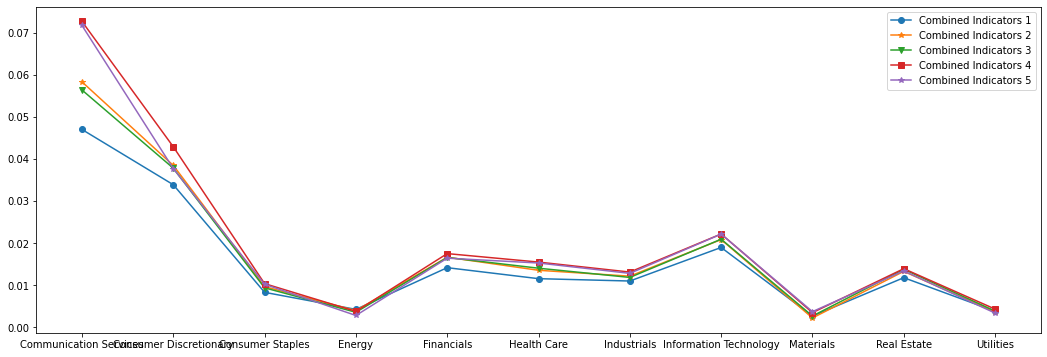

In [9]:
plt.figure(figsize=(18, 6))
xticks = sertors_dict.keys()
plt.plot(xticks, rmse_c1_all, marker='o', label='Combined Indicators 1')
plt.plot(xticks, rmse_c2_all, marker='*', label='Combined Indicators 2')
plt.plot(xticks, rmse_c3_all, marker='v', label='Combined Indicators 3')
plt.plot(xticks, rmse_c4_all, marker='s', label='Combined Indicators 4')
plt.plot(xticks, rmse_c5_all, marker='*', label='Combined Indicators 5')
plt.legend()
plt.show()

In [11]:
preds_train = []
preds_test = []
rmse_c1_all = []
rmse_c2_all = []
rmse_c3_all = []
rmse_c4_all = []
rmse_c5_all = []

for sector in sertors_dict:
    rmse_c1 = []
    rmse_c2 = []
    rmse_c3 = []
    rmse_c4 = []
    rmse_c5 = []
    
    for symbol in sertors_dict[sector]:
        X_train_one = X_train_7.loc[X_train_7['Symbol'] == symbol].copy()
        y_train_one = y_train_7.loc[y_train_7['Symbol'] == symbol].copy()
        X_test_one = X_test_7.loc[X_test_7['Symbol'] == symbol].copy()
        y_test_one = y_test_7.loc[y_test_7['Symbol'] == symbol].copy()
        
        preds_train, preds_test = lstm_train(combined_indicators1, horizons_7, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c1.append(score(horizons_7, y_test_one, preds_test))

        preds_train, preds_test = svr_train(combined_indicators1, horizons_7, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c1.append(score(horizons_7, y_test_one, preds_test))

        preds_train, preds_test = lstm_train(combined_indicators2, horizons_7, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c2.append(score(horizons_7, y_test_one, preds_test))

        preds_train, preds_test = svr_train(combined_indicators2, horizons_7, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c2.append(score(horizons_7, y_test_one, preds_test))

        preds_train, preds_test = lstm_train(combined_indicators3, horizons_7, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c3.append(score(horizons_7, y_test_one, preds_test))

        preds_train, preds_test = svr_train(combined_indicators3, horizons_7, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c3.append(score(horizons_7, y_test_one, preds_test))

        preds_train, preds_test = lstm_train(combined_indicators4, horizons_7, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c4.append(score(horizons_7, y_test_one, preds_test))

        preds_train, preds_test = svr_train(combined_indicators4, horizons_7, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c4.append(score(horizons_7, y_test_one, preds_test))

        preds_train, preds_test = lstm_train(combined_indicators5, horizons_7, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c5.append(score(horizons_7, y_test_one, preds_test))

        preds_train, preds_test = svr_train(combined_indicators5, horizons_7, X_train_one, y_train_one, X_test_one, y_test_one)
        rmse_c5.append(score(horizons_7, y_test_one, preds_test))
    
    rmse_c1_all.append(np.mean(rmse_c1))
    rmse_c2_all.append(np.mean(rmse_c2))
    rmse_c3_all.append(np.mean(rmse_c3))
    rmse_c4_all.append(np.mean(rmse_c4))
    rmse_c5_all.append(np.mean(rmse_c5))

Epoch 1/20
23/23 [==============================] - 4s 9ms/step - loss: 0.0029
Epoch 2/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 3/20
23/23 [==============================] - 0s 9ms/step - loss: 8.1978e-04
Epoch 4/20
23/23 [==============================] - 0s 9ms/step - loss: 5.2824e-04
Epoch 5/20
23/23 [==============================] - 0s 8ms/step - loss: 3.9128e-04
Epoch 6/20
23/23 [==============================] - 0s 9ms/step - loss: 2.5574e-04
Epoch 7/20
23/23 [==============================] - 0s 9ms/step - loss: 2.6918e-04
Epoch 8/20
23/23 [==============================] - 0s 9ms/step - loss: 2.1381e-04
Epoch 9/20
23/23 [==============================] - 0s 9ms/step - loss: 2.1957e-04
Epoch 10/20
23/23 [==============================] - 0s 8ms/step - loss: 2.1219e-04
Epoch 11/20
23/23 [==============================] - 0s 9ms/step - loss: 1.5616e-04
Epoch 12/20
23/23 [==============================] - 0s 8ms/step - loss: 1.9876e-04
Epoch 13/

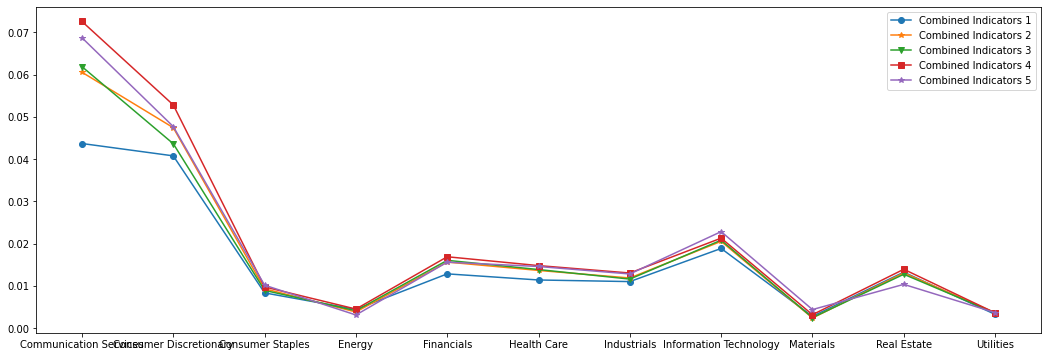

In [12]:
plt.figure(figsize=(18, 6))
xticks = sertors_dict.keys()
plt.plot(xticks, rmse_c1_all, marker='o', label='Combined Indicators 1')
plt.plot(xticks, rmse_c2_all, marker='*', label='Combined Indicators 2')
plt.plot(xticks, rmse_c3_all, marker='v', label='Combined Indicators 3')
plt.plot(xticks, rmse_c4_all, marker='s', label='Combined Indicators 4')
plt.plot(xticks, rmse_c5_all, marker='*', label='Combined Indicators 5')
plt.legend()
plt.show()